# **CS224W - Colab 1**

在这个 Colab 中，我们将写一个**学习网络嵌入**的完整pipeline。
我们将这个过程分三步。

首先，我们将载入一个网络科学中经典的网络—— [空手道俱乐部网络](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). 我们将探索这个图的多个图统计量。

之后，我们将图结构转化为 PyTorch 张量，以便在图上使用机器学习。

最后，我们将完成第一个图上的学习算法：一个节点嵌入模型。为了简单起见，我们的模型比课程中的 DeepWalk/ Node2vec 算法更简单。不过在 Pytorch 上从零写起来也是有好处、有挑战的。

废话不多说，咱们开始吧！

**注意**：确保**顺序执行所有的单元**，以确保中间变量 / 库会正常传递到下一个单元中~


In this Colab, we will write a full pipeline for **learning node embeddings**.
We will go through the following 3 steps.

To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

We will then work together to transform the graph structure into a PyTorch tensor, so that we can perform machine learning over the graph.

Finally, we will finish the first learning algorithm on graphs: a node embedding model. For simplicity, our model here is simpler than DeepWalk / node2vec algorithms taught in the lecture. But it's still rewarding and challenging, as we will write it from scratch via PyTorch.

Now let's get started!

**Note**: Make sure to **sequentially run all the cells**, so that the intermediate variables / packages will carry over to the next cell

# 1 图基础
首先，我们将载入一个网络科学中经典的网络—— [空手道俱乐部网络](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). 我们将探索这个图的多个图统计量。

# 1 Graph Basics
To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

## Setup
我们在这个 Colab 中会疯狂使用 NetworkX

## Setup
We will heavily use NetworkX in this Colab.

In [1]:
import networkx as nx

## Zachary 的空手道俱乐部网络

[空手道俱乐部网络](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) 是描述一个 34 人空手道俱乐部成员的网络，连接表示在俱乐部外这些成员也是有互动的。


## Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.

In [2]:
G = nx.karate_club_graph()

# G is an undirected graph
# G 是一个无向图
type(G)

networkx.classes.graph.Graph

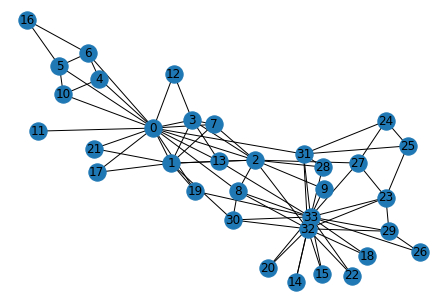

In [3]:
# Visualize the graph
# 可视化这张图
nx.draw(G, with_labels = True)

## 问题 1: 这个空手道网络的平均度是多少？

## Question 1: What is the average degree of the karate club network? (5 Points)

In [4]:
def average_degree(num_edges, num_nodes):
    '''
    TODO: 实现函数，该函数接收边和节点数为输入，并且返回整张图的平均度数。
    请将平均度数取整数（四舍五入）
    '''
    # TODO: Implement this function that takes number of edges
    # and number of nodes, and returns the average node degree of 
    # the graph. Round the result to nearest integer (for example 
    # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

    avg_degree = 0

    ############# Your code here ############
    avg_degree = int(round(num_edges * 2 / num_nodes)) # 图论知识：平均度数是(边数 * 2) / 节点数
    #########################################

    return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


## 问题 2: 这个空手道网络的平均聚类因子是多少？

## Question 2: What is the average clustering coefficient of the karate club network? (5 Points)

In [5]:
def average_clustering_coefficient(G):
    '''
    TODO: 实现函数，该函数接收 nx.Graph 为输入，并且返回整张图的平均聚类因子。
    请将平均度数取小数点后两位（四舍五入）
    '''    
    # TODO: Implement this function that takes a nx.Graph
    # and returns the average clustering coefficient. Round 
    # the result to 2 decimal places (for example 3.333 will
    # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

    avg_cluster_coef = 0

    ############# Your code here ############
    ## Note: 
    ## 1: Please use the appropriate NetworkX clustering function
    '''
    注意：请使用合适的 NetworkX 聚类函数
    '''
    avg_cluster_coef = nx.average_clustering(G) # nx 有这个的实现，不用自己算的！
    avg_cluster_coef = round(avg_cluster_coef, 2)
    #########################################

    return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


## 问题 3: 一次迭代后，节点 0 （id 为 0 的节点) 的 PageRank 数值是多少？

请实现以下 PageRank 公式来完成下面的代码块：
 $$r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}$$

## Question 3: What is the PageRank value for node 0 (node with id 0) after one PageRank iteration? (5 Points)

Please complete the code block by implementing the PageRank equation: $r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}$

In [6]:
def one_iter_pagerank(G, beta, r0, node_id):
    # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
    # The return value r1 is one interation PageRank value for the input node.
    # Please round r1 to 2 decimal places.
    '''
    TODO: 实现函数，该函数接收 nx.Graph, beta, r0, 和节点 id 为输入，
    并且返回 r1，即一次迭代后输入节点的 PageRank 值。
    请将平均度数取小数点后两位（四舍五入）
    '''        
    r1 = 0

    ############# Your code here ############
    ## Note: 
    ## 1: You should not use nx.pagerank
    '''
    注意：别用现成的 nx.pagerank
    '''    
    # 大概流程：获取 id-th 节点的邻居，遍历邻居：
    #     获取邻居对应的出度（无向图，出度就是度数），按公式计算第一项并累加。
    # 乘以beta，加上第二项
    for ni in nx.neighbors(G, node_id): # 遍历 G 中 node_id 节点的邻居 ni
        di = G.degree[ni] # 获取 ni 的度数
        r1 += r0 / di
    r1 = beta * r1 + (1 - beta) * (1 / G.number_of_nodes()) 
    r1 = round(r1, 2)
    #########################################

    return r1

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

The PageRank value for node 0 after one iteration is 0.13


## 问题 4：空手道俱乐部网络节点 5 的（原始）紧密中心度（(raw) closeness centrality）是多少？ 
接近中心度的计算公式为：
$$c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$$

具体的参见，[nx紧密中心度文档](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html)

查了文档以后，发现课程里只介绍了原始的紧密中心度，实际上nx使用的是归一化后的，归一化的计算方法差不多是：

$$c(v) = \frac{1}{AVG_{u \neq v}\text{shortest path length between } u \text{ and } v}$$

$$
c(v)=\frac{n-1}{\sum_{u=1}^{n-1} d(u, v)}
$$
换句话说，在 nx 返回的结果除以 N-1 就行~

PS： 这里还给了一个从头算一次的版本，因为 NX 里面[最短路](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html)这个函数我的确需要用到

## Question 4: What is the (raw) closeness centrality for the karate club network node 5? (5 Points)

The equation for closeness centrality is
$$c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$$

In [7]:
def closeness_centrality(G, node=5):
    # TODO: Implement the function that calculates closeness centrality 
    # for a node in karate club network. G is the input karate club 
    # network and node is the node id in the graph. Please round the 
    # closeness centrality result to 2 decimal places.
    '''
    TODO: 实现函数，该函数接收 nx.Graph（空手道俱乐部）, 节点的 id 为输入，
    并且返回该空手道俱乐部指定节点的紧密中心度。
    请将平均度数取小数点后两位（四舍五入）
    '''      
    closeness = 0
    

    ## Note:
    ## 1: You can use networkx closeness centrality function.
    ## 2: Notice that networkx closeness centrality returns the normalized 
    ## closeness directly, which is different from the raw (unnormalized) 
    ## one that we learned in the lecture.
    '''
    注意：
    1. 可使用 networkx 的紧密中心度函数
    2. networkx 的紧密中心度函数返回的是 Normalized 后的数值，和我们要求的“原始（raw）”不一致
    具体咋不一样，可以看一下课程内容~
    '''
    norm_clossness = nx.algorithms.centrality.closeness_centrality(G, u = node)
    N = G.number_of_nodes()
    raw_clossness = norm_clossness / (N - 1)
    closeness = round(raw_clossness,2) 
        
    #########################################

    return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The karate club network has closeness centrality {}".format(closeness))

The karate club network has closeness centrality 0.01


In [8]:
'''
来都来了，重新算一遍咋样？
'''
def closeness_centrality(G, node=5): 
    closeness = 0
    
    # 首先，计算 node 与其他点之间的最短路径
    # https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html
    shortest_paths = nx.shortest_path_length(G, source = node)
    # 返回一个节点 id → 距离的字典
    # print(shortest_paths)
    paths_sum = 0
    for i in range(G.number_of_nodes()):
        # 遍历所有节点（除了自身）
        paths_sum += shortest_paths[i] # 不过因为本来自己到自己的距离是0，因此不需要判断是不是自身
            
    
    raw_clossness = 1 / paths_sum 
    closeness = round(raw_clossness,2) 
        
    #########################################

    return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The karate club network has closeness centrality {}".format(closeness))


The karate club network has closeness centrality 0.01


# 2 化图为 Tensor
之后我们一起把图 $G$ 转为一个 Pytorch tensor, 以便之后对图进行机器学习.

# 2 Graph to Tensor
We will then work together to transform the graph $G$ into a PyTorch tensor, so that we can perform machine learning over the graph.

## Setup
请确保 Pytorch 已安装

Check if PyTorch is properly installed

In [9]:
import torch
print(torch.__version__)

1.7.1


## PyTorch tensor 基础

我们可以用全 0、全 1 和随机变量创建 Pytorch Tensor.

## PyTorch tensor basics

We can generate PyTorch tensor with all zeros, ones or random values.

In [10]:
# Generate 3 x 4 tensor with all ones
# 生成 3 x 4 的全 1 Tensor
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
# 生成 3 x 4 的全 0 Tensor
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
# 生成 3 x 4 的 Tensor，元素为取值在 [0,1) 之间的随机变量
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
# 获取 Tensor 的形状
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.0785, 0.1740, 0.1678, 0.7831],
        [0.9760, 0.4668, 0.2761, 0.5425],
        [0.5935, 0.0531, 0.0593, 0.3211]])
torch.Size([3, 4])


一个 PyTorch tensor 的所有元素都属于同一个数据类型，`dtype`.

PyTorch tensor contains elements for a single data type, the `dtype`.

In [11]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
# 生成 3 x 4 的全 0，32-位浮点数 Tensor
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
# 将 Tensor 强制类型转换为 64 位的整数
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


## 问题5：获取空手道俱乐部网络的边缘列表，并将其转化为 `torch.LongTensor`。 `pos_edge_index` 张量的 `torch.sum` 值是多少？ 

## Question 5: Getting the edge list of the karate club network and transform it into `torch.LongTensor`. What is the `torch.sum` value of `pos_edge_index` tensor? (10 Points)

In [12]:
def graph_to_edge_list(G):
    # TODO: Implement the function that returns the edge list of
    # an nx.Graph. The returned edge_list should be a list of tuples
    # where each tuple is a tuple representing an edge connected 
    # by two nodes.
    '''
    TODO: 实现函数，该函数接收 nx.Graph（空手道俱乐部）为输入，
    并且返回 nx.Graph 对应的边缘列表，该列表的元素是元组，表示连接的两个点
    ''' 
    edge_list = []

    ############# Your code here ############
    for edge in G.edges(): # 就……这么简单，毕竟这个图本来就是按照元组存的边
        edge_list.append(edge)
    #########################################

    return edge_list

def edge_list_to_tensor(edge_list):
    # TODO: Implement the function that transforms the edge_list to
    # tensor. The input edge_list is a list of tuples and the resulting
    # tensor should have the shape [2 x len(edge_list)].
    '''
    TODO: 实现函数，该函数接收边缘列表（元组的列表） edge_list 为输入，
    并且返回边缘列表转换的 Tensor，形状为[2 x len(edge_list)].。
    ''' 
    edge_index = torch.tensor([])

    ############# Your code here ############
    edge_index = torch.LongTensor(edge_list) # emmm，就当学习一下强制类型转换
    edge_index = edge_index.t() # 为了满足形状要求，还得 .t() 转置
    #########################################

    return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


In [13]:
# 不太放心所以打一下结果看看
print(pos_edge_list)
print(pos_edge_index)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,
          4,  5,  5,  5,  6,  8,  8,  8,  9, 13, 14, 14, 15, 15, 18, 18, 19, 20,
         20, 22, 22, 23, 23, 23, 23, 23

## 问题6：请实现以下采样负边的函数。 然后你会回答空手道俱乐部网络中哪些边（edge_1 到 edge_5）可以是负的？

所谓**负边就是不存在于图中的边**，因此我们需要一个判断边是否存在于图中的函数，并且最好一次性获取所有存在（or 不存在）的边，方便我们进行采样。


## Question 6: Please implement following function that samples negative edges. Then you will answer which edges (edge_1 to edge_5) can be negative ones in the karate club network? (10 Points)

### Preliminaries: NX 关于边存在性的函数 
这块本来文件没有的，不用找了（

In [14]:
print('边的存在性检验')
print(G.has_edge(1,0)) #判断图 G 是否存在从 1 到 0 的边

print('其实可以直接变成')
print(nx.non_edges(G)) # 这个返回不存在的边
for non_edge in nx.non_edges(G): # 所以说这玩意类似个迭代器
    print(non_edge)
    break
# 可以通过索引获取 non_edges 函数返回的元素：
for i,e in enumerate(nx.non_edges(G)):
    print(i)
    print(e)
    break
# 将 non_edges 转为 list
non_edges = list(enumerate(nx.non_edges(G)))
print(len(non_edges),non_edges[1])
# 当然，也不用这样强行把索引加进来
non_edges = list(nx.non_edges(G))
print(len(non_edges), non_edges[1])

print('自环，重复边检验')
# EX：因为下面的题目说到了，先检测一下这些 non_edges 有没有自环，以及会不会多次出现（比如同时有 (1,0) (0,1)）
flag_self_loop = 0
for edges in non_edges:
    if edges[0] == edges[1]:
        print(edges[0],edges[1],'自环！')
        flag_self_loop = 1
        break
print("Non_edges 不存在自环") if flag_self_loop == 0 else print("Non_edges 存在自环")
# print(non_edges)

source = non_edges[0][0]
end = non_edges[0][1]
flag_repeat = 0
for edges in non_edges[1:]:
    if(source == edges[1] and end == edges[0]):
        print("重复！")
        flag_repeat = 1
        break 
print("Non_edges 不存在重复") if flag_repeat == 0 else print("Non_edges 存在重复")

# 白担心了……

边的存在性检验
True
其实可以直接变成
<generator object non_edges at 0x7fa6fca610b0>
(0, 32)
0
(0, 32)
483 (1, (0, 33))
483 (0, 33)
自环，重复边检验
Non_edges 不存在自环
Non_edges 不存在重复


In [15]:
import random

def sample_negative_edges(G, num_neg_samples):
    # TODO: Implement the function that returns a list of negative edges.
    # The number of sampled negative edges is num_neg_samples. You do not
    # need to consider the corner case when the number of possible negative edges
    # is less than num_neg_samples. It should be ok as long as your implementation 
    # works on the karate club network. In this implementation, self loop should 
    # not be considered as either a positive or negative edge. Also, notice that 
    # the karate club network is an undirected graph, if (0, 1) is a positive 
    # edge, do you think (1, 0) can be a negative one?
    '''
    TODO: 实现函数，输入为 nx.Graph G,以及所需的负边采样数，
    返回一个由负边组成的列表。现在无需考虑负边够不够多之类的边界条件。
    在这个实现中自环不能被考虑（不算正边也不算负边），
    除此之外，因为空手道俱乐部是个无向图，如果 (0,1) 都tm是正的了，你觉得 (1,0) 可能是负的吗？
    '''
    neg_edge_list = []

    ############# Your code here ############
    non_edges = list(nx.non_edges(G))
    neg_edge_list = random.sample(non_edges, num_neg_samples)
    #########################################

    return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Your code here ############
## Note:
## 1: For each of the 5 edges, print whether it can be negative edge
edge_candidate = [edge_1, edge_2, edge_3, edge_4, edge_5]
for i, edge in enumerate(edge_candidate):
    print('edge_{}'.format(i+1) + ("不是" if G.has_edge(edge[0], edge[1]) else "是") + "负边")
#########################################

The neg_edge_index tensor has shape torch.Size([2, 78])
edge_1不是负边
edge_2是负边
edge_3不是负边
edge_4不是负边
edge_5是负边


# 3 节点嵌入学习

最终，我们终于可以完成第一个图上的学习算法了：节点嵌入模型


# 3 Node Emebedding Learning

Finally, we will finish the first learning algorithm on graphs: a node embedding model.


## Setup

In [16]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

1.7.1


为了写出我们的节点嵌入学习方法，我们将大量使用 Pytorch 的 [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) 模块.

让我们看看如何使用 `nn.Embedding`:


To write our own node embedding learning methods, we'll heavily use the [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) module in PyTorch. Let's see how to use `nn.Embedding`:

In [17]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

# 初始化一个嵌入层
# 假设我们要对 4 个元素（比如节点）进行嵌入，每个元素都会被表示成一个 8 维的向量

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


我们可以直接使用 Tensor 的索引选取嵌入矩阵中某个元素对应的嵌入

We can select items from the embedding matrix, by using Tensor indices

In [18]:
# Select an embedding in emb_sample
# 在 emb_sample 中选取一个嵌入
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
# 选取多个嵌入
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
# 获取嵌入权重的矩阵
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
# 将权重用全 1 的 Tensor 覆盖
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
# Ok,现在我们看看 emb 是不是真的被初始化了
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[ 0.5906, -0.4789, -0.9818, -1.2229, -0.7975, -1.1523, -1.0281,  1.0550]],
       grad_fn=<EmbeddingBackward>)
tensor([[ 0.5906, -0.4789, -0.9818, -1.2229, -0.7975, -1.1523, -1.0281,  1.0550],
        [ 0.7809,  0.3156,  1.0791, -1.7672, -1.3084,  0.2076,  0.9902, -0.1875]],
       grad_fn=<EmbeddingBackward>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward>)


现在轮到你给咱们的图创建节点嵌入矩阵辣！
- 我们想将空手道俱乐部网络的每个向量嵌入为 **16 维向量**。
- 我们希望使用取值 $[0, 1)$ 的**均匀分布**初始化这个矩阵，并且推荐使用  [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html) 函数。

Now, it's your time to create node embedding matrix for the graph we have!
- We want to have **16 dimensional** vector for each node in the karate club network.
- We want to initalize the matrix under **uniform distribution**, in the range of $[0, 1)$. We suggest you using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [19]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
    # TODO: Implement this function that will create the node embedding matrix.
    # A torch.nn.Embedding layer will be returned. You do not need to change 
    # the values of num_node and embedding_dim. The weight matrix of returned 
    # layer should be initialized under uniform distribution. 
    '''
    TODO：实现函数，这个函数将创建节点嵌入矩阵，其实按照输入的 num_node 和 embedding_dim 返回一个 torch.nn.Embedding 层就好了
    不过记得把层的权重初始化为均匀分布哦~
    '''
    emb = None

    ############# Your code here ############
    emb = nn.Embedding(num_embeddings = num_node, embedding_dim = embedding_dim)
    shape = emb.weight.data.shape
    emb.weight.data = torch.rand(shape)
    #########################################

    return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward>)


## 可视化初始的节点嵌入
理解嵌入矩阵的一种好方法是在 2D 空间中对其进行可视化。
在这里，我们已经为你实现了嵌入可视化功能。
我们首先进行 PCA 以将嵌入的维度降低到 2D 空间。（注意之前要把数据转成 numpy）
然后可视化每个点，由它所属的社区着色。

## Visualize the initial node embeddings
One good way to understand an embedding matrix, is to visualize it in a 2D space.
Here, we have implemented an embedding visualization function for you.
We first do PCA to reduce the dimensionality of embeddings to a 2D space.
Then visualize each point, colored by the community it belongs to.

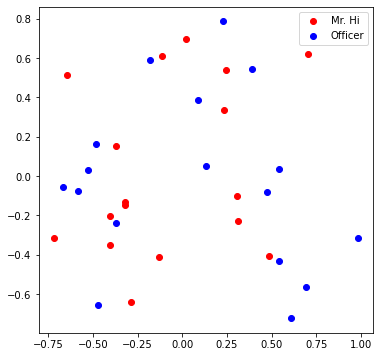

In [20]:
def visualize_emb(emb):
    X = emb.weight.data.numpy()
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    plt.figure(figsize=(6, 6))
    club1_x = []
    club1_y = []
    club2_x = []
    club2_y = []
    for node in G.nodes(data=True):
        if node[1]['club'] == 'Mr. Hi':
            club1_x.append(components[node[0]][0])
            club1_y.append(components[node[0]][1])
        else:
            club2_x.append(components[node[0]][0])
            club2_y.append(components[node[0]][1])
    plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
    plt.scatter(club2_x, club2_y, color="blue", label="Officer")
    plt.legend()
    plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

## 问题 7: 训练这个嵌入吧！你能做把 loss 和 accuracy 做的多好？

## Question 7: Training the embedding! What is the best performance you can get? Please report both the best loss and accuracy on Gradescope. (20 Points)

In [21]:
from torch.optim import SGD

def accuracy(pred, label):
    # TODO: Implement the accuracy function. This function takes the 
    # pred tensor (the resulting tensor after sigmoid) and the label 
    # tensor (torch.LongTensor). Predicted value greater than 0.5 will 
    # be classified as label 1. Else it will be classified as label 0.
    # The returned accuracy should be rounded to 4 decimal places. 
    # For example, accuracy 0.82956 will be rounded to 0.8296.
    '''
    TODO：实现精度函数，它接收预测向量（Sigmoid 之后的分类结果）以及标签向量（torch.LongTensor）
    预测值大于 0.5 就被认为分到 label 1 里，反之则是 label 0
    返回的精度应该被四舍五入至小数点后 4 位
    '''
    accu = 0.0

    ############# Your code here ############
    # 二分类问题，代码不用很复杂
    true = ((pred>0.5) == label).sum().item()
    accu = true / len(pred)
    accu = round(accu, 4)
    #########################################

    return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
    # TODO: Train the embedding layer here. You can also change epochs and 
    # learning rate. In general, you need to implement: 
    # (1) Get the embeddings of the nodes in train_edge
    # (2) Dot product the embeddings between each node pair
    # (3) Feed the dot product result into sigmoid
    # (4) Feed the sigmoid output into the loss_fn
    # (5) Print both loss and accuracy of each epoch 
    # (as a sanity check, the loss should decrease during training)
    '''
    TODO：在这里训练嵌入层。可以改变 epochs 和学习率。大体上你要实现：
    1. 获取 train_edge 中节点的嵌入
    2. 在每个节点对之间点乘嵌入向量
    3. 把点乘的结果喂给 sigmoid
    4. 把 Sigmoid 的结果喂给损失函数 loss_fn
    5. 在每个 epoch 打印 loss 和 accuracy
    ps：作为完整性检查(sanity check) 损失函数应该在训练中下降
    '''
    epochs = 300
    learning_rate = 0.1

    optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

    for i in range(epochs):

        ############# Your code here ############
        optimizer.zero_grad()
        train_emb_0 = emb(train_edge[0])
        train_emb_1 = emb(train_edge[1])
        dot_product = torch.mul(train_emb_0, train_emb_1) # torch.dot 需要输入一维张量，所以这里只能先按位乘了
        dot_product = dot_product.sum(dim = 1)
        sig_dot = sigmoid(dot_product)
        
        loss = loss_fn(sig_dot, train_label)
        loss.backward()
        optimizer.step()
        if i%10 == 0:
            print("Loss: {}, ACC: {}".format(loss, accuracy(sig_dot, train_label)))
        
        #########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)

train(emb, loss_fn, sigmoid, train_label, train_edge)

Loss: 1.9689925909042358, ACC: 0.5
Loss: 1.4895044565200806, ACC: 0.5
Loss: 0.9273926019668579, ACC: 0.5128
Loss: 0.6627469062805176, ACC: 0.6346
Loss: 0.5549028515815735, ACC: 0.7115
Loss: 0.4948697090148926, ACC: 0.7564
Loss: 0.4475301206111908, ACC: 0.8205
Loss: 0.40346595644950867, ACC: 0.8846
Loss: 0.3607071042060852, ACC: 0.9231
Loss: 0.3195088505744934, ACC: 0.9423
Loss: 0.28073030710220337, ACC: 0.9744
Loss: 0.2452128529548645, ACC: 0.9872
Loss: 0.21351765096187592, ACC: 0.9936
Loss: 0.18584977090358734, ACC: 1.0
Loss: 0.16209612786769867, ACC: 1.0
Loss: 0.1419236660003662, ACC: 1.0
Loss: 0.12488843500614166, ACC: 1.0
Loss: 0.11052284389734268, ACC: 1.0
Loss: 0.09838929772377014, ACC: 1.0
Loss: 0.08810477703809738, ACC: 1.0
Loss: 0.079346664249897, ACC: 1.0
Loss: 0.07184892892837524, ACC: 1.0
Loss: 0.06539449095726013, ACC: 1.0
Loss: 0.05980699509382248, ACC: 1.0
Loss: 0.05494311451911926, ACC: 1.0
Loss: 0.050686221569776535, ACC: 1.0
Loss: 0.046941109001636505, ACC: 1.0
Loss: 

## 可视化最终的节点嵌入

在这里可视化最终的节点嵌入吧！

你可以比较下面的图和之前图的区别~
选前之后，你应该能发现两个类别的节点被明显的分开了！
这也是对你实现的一个很好的完整性检验哦！

## Visualize the final node embeddings
Visualize your final embedding here! 
You can visually compare the figure with the previous embedding figure. 
After training, you should oberserve that the two classes are more evidently separated. 
This is a great sanitity check for your implementation as well.

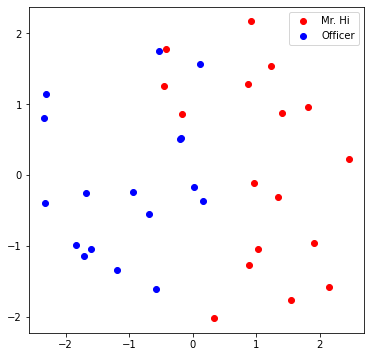

In [22]:
# Visualize the final learned embedding
visualize_emb(emb)

# Submission

In order to get credit, you must go submit your answers on Gradescope.
